<a href="https://colab.research.google.com/github/nic0ly/lia1-2023-1/blob/main/Entregas%20-%20Nicoly/Entrega_8_fast_ai_Aula_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 85.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.6/485.6 kB 49.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 87.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 76.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 125.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 46.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
#hide
from fastbook import *

In [3]:
import os
os.makedirs('images', exist_ok=True)

In [4]:
os.path.abspath('images')

'/content/images'

In [5]:
os.listdir('images')

[]

In [6]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)

In [7]:
#hide
Path.BASE_PATH = path

In [8]:
path.ls()

(#2) [Path('images'),Path('annotations')]

In [9]:
(path/"images").ls()

(#7393) [Path('images/pug_57.jpg'),Path('images/Abyssinian_166.jpg'),Path('images/american_bulldog_53.jpg'),Path('images/english_cocker_spaniel_78.jpg'),Path('images/american_pit_bull_terrier_90.jpg'),Path('images/Persian_107.jpg'),Path('images/boxer_4.jpg'),Path('images/american_bulldog_166.jpg'),Path('images/newfoundland_194.jpg'),Path('images/great_pyrenees_119.jpg')...]

In [10]:
fname = (path/"images").ls()[0]

In [11]:
re.findall(r'(.+)_\d+.jpg$', fname.name)

['pug']

In [14]:
pets = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files,
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224, min_scale=0.75))
dls = pets.dataloaders(path/"images")

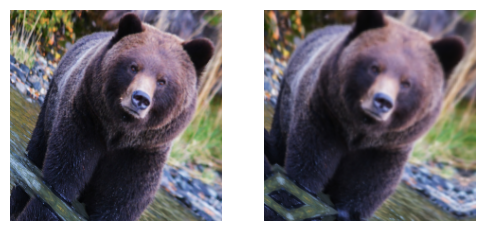

In [15]:
#hide_input
#id interpolations
#caption A comparison of fastai's data augmentation strategy (left) and the traditional approach (right).
dblock1 = DataBlock(blocks=(ImageBlock(), CategoryBlock()),
                   get_y=parent_label,
                   item_tfms=Resize(460))
# Place an image in the 'images/grizzly.jpg' subfolder where this notebook is located before running this
dls1 = dblock1.dataloaders([(Path.cwd()/'images'/'grizzly.jpg')]*100, bs=8)
dls1.train.get_idxs = lambda: Inf.ones
x,y = dls1.valid.one_batch()
_,axs = subplots(1, 2)

x1 = TensorImage(x.clone())
x1 = x1.affine_coord(sz=224)
x1 = x1.rotate(draw=30, p=1.)
x1 = x1.zoom(draw=1.2, p=1.)
x1 = x1.warp(draw_x=-0.2, draw_y=0.2, p=1.)

tfms = setup_aug_tfms([Rotate(draw=30, p=1, size=224), Zoom(draw=1.2, p=1., size=224),
                       Warp(draw_x=-0.2, draw_y=0.2, p=1., size=224)])
x = Pipeline(tfms)(x)
#x.affine_coord(coord_tfm=coord_tfm, sz=size, mode=mode, pad_mode=pad_mode)
TensorImage(x[0]).show(ctx=axs[0])
TensorImage(x1[0]).show(ctx=axs[1]);

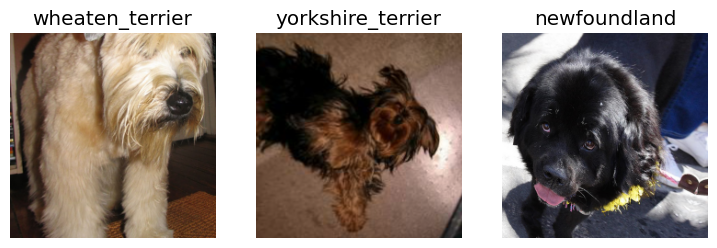

In [16]:
dls.show_batch(nrows=1, ncols=3)

In [17]:
#hide_output
pets1 = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files,
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),

                 item_tfms = Resize(244))
pets1.summary(path/"images")

Setting-up type transforms pipelines
Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/Abyssinian_174.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=317x246
  Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/Abyssinian_174.jpg
    applying partial gives
      Abyssinian
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(0)

Final sample: (PILImage mode=RGB size=317x246, TensorCategory(0))


Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
Setting up after_item

In [18]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 209MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.517072,0.392501,0.123139,01:31


epoch,train_loss,valid_loss,error_rate,time
0,0.500210,0.300021,0.089310,01:29
1,0.318770,0.261107,0.079161,01:29


In [19]:
x,y = dls.one_batch()

In [20]:
y

TensorCategory([35, 20, 14, 36, 33,  7, 17, 15, 36, 14, 15, 12, 21, 10,  8, 32, 10, 31, 12, 31, 10, 14, 35, 33, 36, 28, 19, 35,  1, 24, 28, 20,  9, 28, 14, 10, 36,  4, 16, 24, 30, 24, 34, 24,  3, 28,
                36, 22, 30, 10, 28,  1,  9, 17, 10, 18, 23,  4, 32, 27, 32, 18, 12,  5], device='cuda:0')

In [21]:
preds,_ = learn.get_preds(dl=[(x,y)])
preds[0]

tensor([1.4229e-10, 3.2025e-10, 4.0523e-11, 3.8294e-11, 2.7061e-09, 5.4325e-10, 2.8153e-09, 3.0779e-09, 1.4704e-10, 1.5915e-08, 1.2232e-11, 2.8223e-11, 6.8684e-11, 6.7160e-11, 1.9798e-10, 7.0392e-10,
        2.7842e-09, 2.2848e-11, 5.8313e-09, 9.2043e-12, 2.0467e-09, 3.4345e-09, 1.9118e-07, 1.6991e-10, 4.0735e-11, 9.6761e-09, 2.8059e-12, 1.4724e-08, 6.0934e-10, 1.6669e-10, 2.6466e-10, 3.7400e-10,
        6.7161e-09, 5.4749e-11, 9.1391e-10, 1.0000e+00, 6.9251e-11])

In [22]:
len(preds[0]),preds[0].sum()

(37, tensor(1.0000))

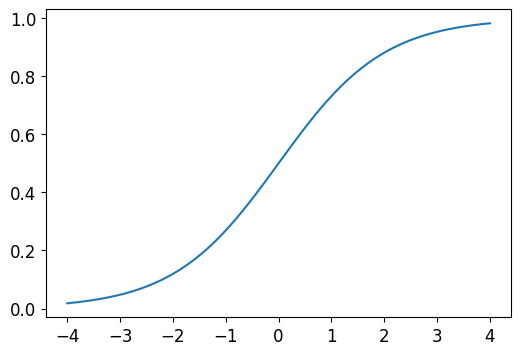

In [23]:
plot_function(torch.sigmoid, min=-4,max=4)

In [24]:
#hide
torch.random.manual_seed(42);

In [25]:
acts = torch.randn((6,2))*2
acts

tensor([[ 0.6734,  0.2576],
        [ 0.4689,  0.4607],
        [-2.2457, -0.3727],
        [ 4.4164, -1.2760],
        [ 0.9233,  0.5347],
        [ 1.0698,  1.6187]])

In [26]:
acts.sigmoid()

tensor([[0.6623, 0.5641],
        [0.6151, 0.6132],
        [0.0957, 0.4079],
        [0.9881, 0.2182],
        [0.7157, 0.6306],
        [0.7446, 0.8346]])

In [27]:
(acts[:,0]-acts[:,1]).sigmoid()

tensor([0.6025, 0.5021, 0.1332, 0.9966, 0.5959, 0.3661])

In [31]:
sm_acts = torch.softmax(acts, dim=1)
sm_acts

tensor([[0.6025, 0.3975],
        [0.5021, 0.4979],
        [0.1332, 0.8668],
        [0.9966, 0.0034],
        [0.5959, 0.4041],
        [0.3661, 0.6339]])

In [32]:
targ = tensor([0,1,0,1,1,0])

In [33]:
sm_acts

tensor([[0.6025, 0.3975],
        [0.5021, 0.4979],
        [0.1332, 0.8668],
        [0.9966, 0.0034],
        [0.5959, 0.4041],
        [0.3661, 0.6339]])

In [34]:
idx = range(6)
sm_acts[idx, targ]

tensor([0.6025, 0.4979, 0.1332, 0.0034, 0.4041, 0.3661])

In [35]:
#hide_input
from IPython.display import HTML
df = pd.DataFrame(sm_acts, columns=["3","7"])
df['targ'] = targ
df['idx'] = idx
df['result'] = sm_acts[range(6), targ]
t = df.style.hide_index()
#To have html code compatible with our script
html = t._repr_html_().split('</style>')[1]
html = re.sub(r'<table id="([^"]+)"\s*>', r'<table >', html)
display(HTML(html))

<ipython-input-35-3b2375eb13f7>:7: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  t = df.style.hide_index()


3,7,targ,idx,result
0.602469,0.397531,0,0,0.602469
0.502065,0.497935,1,1,0.497935
0.133188,0.866811,0,2,0.133188
0.996640,0.003360,1,3,0.003360
0.595949,0.404051,1,4,0.404051
0.366118,0.633882,0,5,0.366118


In [36]:
-sm_acts[idx, targ]

tensor([-0.6025, -0.4979, -0.1332, -0.0034, -0.4041, -0.3661])

In [37]:
F.nll_loss(sm_acts, targ, reduction='none')

tensor([-0.6025, -0.4979, -0.1332, -0.0034, -0.4041, -0.3661])

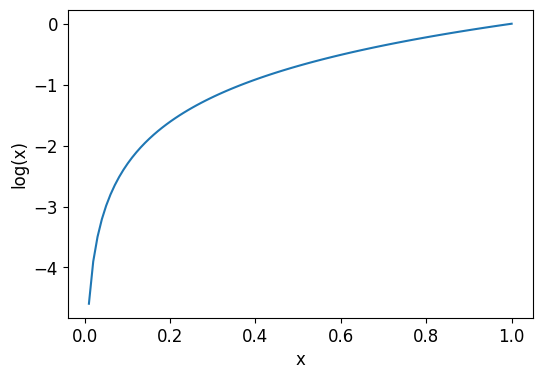

In [38]:
plot_function(torch.log, min=0,max=1, ty='log(x)', tx='x')

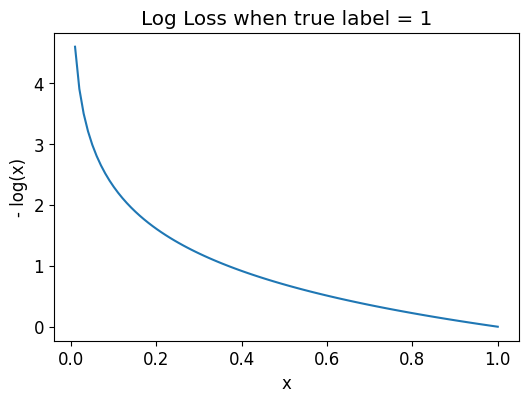

In [39]:
plot_function(lambda x: -1*torch.log(x), min=0,max=1, tx='x', ty='- log(x)', title = 'Log Loss when true label = 1')

In [40]:
#hide_input
from IPython.display import HTML
df['loss'] = -torch.log(tensor(df['result']))
t = df.style.hide_index()
#To have html code compatible with our script
html = t._repr_html_().split('</style>')[1]
html = re.sub(r'<table id="([^"]+)"\s*>', r'<table >', html)
display(HTML(html))

<ipython-input-40-365cb7ba650e>:4: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  t = df.style.hide_index()


3,7,targ,idx,result,loss
0.602469,0.397531,0,0,0.602469,0.506720
0.502065,0.497935,1,1,0.497935,0.697285
0.133188,0.866811,0,2,0.133188,2.015990
0.996640,0.003360,1,3,0.003360,5.695763
0.595949,0.404051,1,4,0.404051,0.906213
0.366118,0.633882,0,5,0.366118,1.004798


In [41]:
loss_func = nn.CrossEntropyLoss()

In [42]:
loss_func(acts, targ)

tensor(1.8045)

In [43]:
F.cross_entropy(acts, targ)

tensor(1.8045)

In [44]:
nn.CrossEntropyLoss(reduction='none')(acts, targ)

tensor([0.5067, 0.6973, 2.0160, 5.6958, 0.9062, 1.0048])

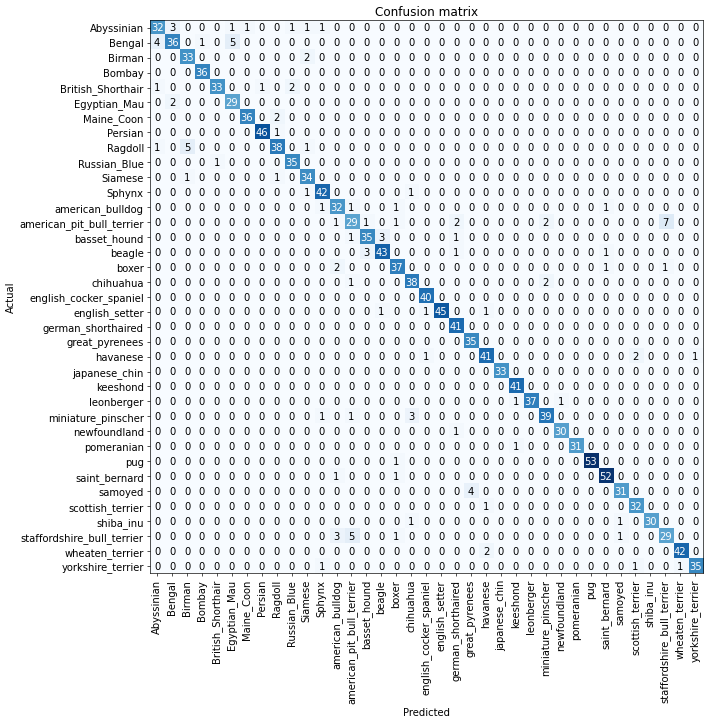

In [45]:
#width 600
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [46]:
interp.most_confused(min_val=5)

[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 7),
 ('Bengal', 'Egyptian_Mau', 5),
 ('Ragdoll', 'Birman', 5),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 5)]

In [47]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1, base_lr=0.1)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,2.819346,5.695899,0.459405,01:26


epoch,train_loss,valid_loss,error_rate,time
0,3.718248,1.898023,0.554804,01:31


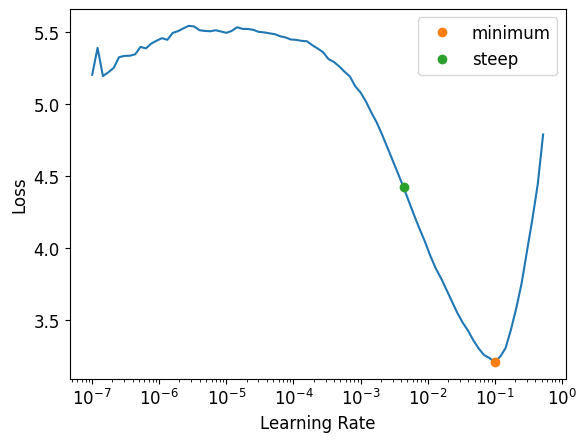

In [48]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
lr_min,lr_steep = learn.lr_find(suggest_funcs=(minimum, steep))

In [49]:
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

Minimum/10: 1.00e-02, steepest point: 4.37e-03


In [50]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2, base_lr=3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.329411,0.382016,0.107578,01:28


epoch,train_loss,valid_loss,error_rate,time
0,0.540506,0.435366,0.123816,01:30
1,0.327374,0.252147,0.078484,01:28


In [51]:
learn.fine_tune??

In [52]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(3, 3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.135183,0.356830,0.109608,01:25
1,0.514543,0.287885,0.087280,01:27
2,0.329355,0.237309,0.069012,01:27


In [53]:
learn.unfreeze()

SuggestedLRs(valley=1.737800812406931e-05)

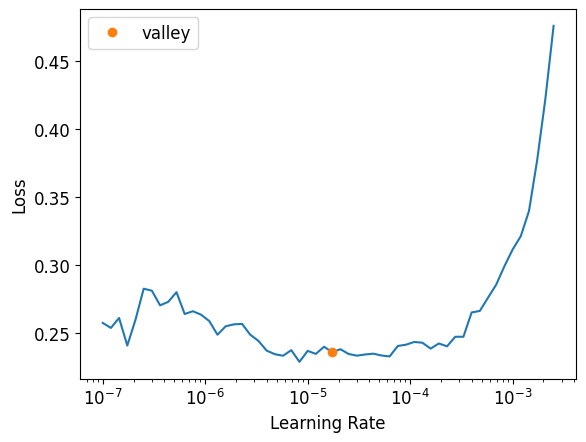

In [54]:
learn.lr_find()

In [55]:
learn.fit_one_cycle(6, lr_max=1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,0.257806,0.230476,0.065629,01:30
1,0.239053,0.218445,0.065629,01:29
2,0.227826,0.214734,0.066982,01:30
3,0.196582,0.211727,0.060217,01:27
4,0.198732,0.211928,0.062923,01:31
5,0.185332,0.210793,0.063599,01:26


In [56]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(3, 3e-3)
learn.unfreeze()
learn.fit_one_cycle(12, lr_max=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,1.120270,0.328230,0.099459,01:25
1,0.533110,0.273672,0.086604,01:27
2,0.324584,0.239982,0.079161,01:29


epoch,train_loss,valid_loss,error_rate,time
0,0.265802,0.239888,0.072395,01:31
1,0.244766,0.230375,0.071042,01:30
2,0.225141,0.229860,0.073072,01:35
3,0.203017,0.222542,0.071719,01:30
4,0.187122,0.207555,0.066982,01:26
5,0.178994,0.209173,0.065629,01:30
6,0.161701,0.209209,0.065629,01:28
7,0.148831,0.209464,0.064953,01:29
8,0.137207,0.209882,0.064953,01:29
9,0.127438,0.209599,0.065629,01:26


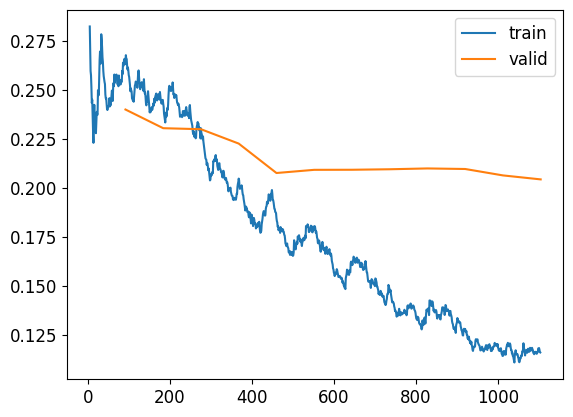

In [57]:
learn.recorder.plot_loss()

In [58]:
from fastai.callback.fp16 import *
learn = vision_learner(dls, resnet50, metrics=error_rate).to_fp16()
learn.fine_tune(6, freeze_epochs=3)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 305MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.263564,0.312477,0.100135,01:28
1,0.576743,0.301227,0.089986,01:24
2,0.428806,0.277372,0.083897,01:23


epoch,train_loss,valid_loss,error_rate,time
0,0.255448,0.274864,0.083221,01:28
1,0.333036,0.365663,0.098782,01:27
2,0.253072,0.293012,0.079161,01:24
3,0.150875,0.270584,0.069689,01:28
4,0.088997,0.231228,0.060893,01:27
5,0.059594,0.221108,0.060217,01:24
